The text file contain complete loan data for all loans issued by XYZ Corp. through 2007-2015. The data contains the indicator of default, payment information, credit history, etc.

we will have to use the training data to build model and finally apply it to test data to measure the performance and robustness of the model.

"default_ind"(0 or 1) is the y variable(target column) we have to predict with test data.

For this we will be using classification algorithm Random forest.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_table(r'XYZCorp_LendingData.txt')
pd.set_option('display.max_columns', None)
data.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2       NaN  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   
2     15.96        84.33     C        C5       NaN  10+ years           RENT   

   annual_inc verification_status   issue_d pymnt_plan  \
0     24000.0            Verified  Dec-2011          n   
1     30000.0     Source Verified  Dec-2011          n   
2     12252.0        Not Verified  Dec-2011          n   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Jan-1985             1.0                     NaN   
1         Apr-1999             5.0                     NaN   
2         Nov-2001             2.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0    13648.0        83.7   
1                     NaN       3.0      0.0     1687.0         9.4   
2                     NaN       2.0      0.0     2956.0        98.5   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0        9.0                   f        0.0            0.0  5861.071414   
1        4.0                   f        0.0            0.0  1008.710000   
2       10.0                   f        0.0            0.0  3003.653644   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                 0.0   
1          1008.71           456.46         435.17                 0.0   
2          3003.65          2400.00         603.65                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00     Jan-2015           171.62   
1      117.08                     1.11     Apr-2013           119.66   
2        0.00                     0.00     Jun-2014           649.91   

  next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
0          NaN           Jan-2016                         0.0   
1          NaN           Sep-2013                         0.0   
2          NaN           Jan-2016                         0.0   

   mths_since_last_major_derog  policy_code application_type  \
0                          NaN          1.0       INDIVIDUAL   
1                          NaN          1.0       INDIVIDUAL   
2                          NaN          1.0       INDIVIDUAL   

   annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  \
0               NaN        NaN                       NaN             0.0   
1               NaN        NaN                       NaN             0.0   
2               NaN        NaN                       NaN             0.0   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  \
0           NaN          NaN          NaN         NaN          NaN   
1           NaN          NaN          NaN         NaN          NaN   
2           NaN          NaN          NaN         NaN          NaN   

   open_il_24m  mths_since_rcnt_il  total_bal_il  il_util 

In [3]:
data.shape

(855969, 73)

In [4]:
#droping unimportant columns(which have only one unique value,dates,addresses,zipcodes...etc)
data=data.drop(['pymnt_plan','policy_code','next_pymnt_d','title','emp_title','earliest_cr_line','zip_code','last_pymnt_d','last_credit_pull_d','id','issue_d'],axis=1)

In [5]:
data.shape

(855969, 62)

In [6]:
#deleting columns having more than 40% null val
l=data.isnull().sum()
for i in range(len(l)):
    if l[i]>342387:
        del data[(l.index[i])]

In [7]:
data.shape

(855969, 41)

In [8]:
data.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      446
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv             

In [9]:
data.emp_length.value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [10]:
#filling null value columns which have less than 40% nullvalues
data.revol_util=data.revol_util.fillna(data.revol_util.mean())
data.emp_length=data.emp_length.fillna('5 years')#calculated mean and rounded value i.e 5
data.tot_coll_amt=data.tot_coll_amt.fillna(data.tot_coll_amt.mean())
data.tot_cur_bal=data.tot_cur_bal.fillna(data.tot_cur_bal.mean())
data.total_rev_hi_lim=data.total_rev_hi_lim.fillna(data.total_rev_hi_lim.mean())
data.collections_12_mths_ex_med=data.collections_12_mths_ex_med.fillna(data.collections_12_mths_ex_med.mean())

In [11]:
#making sure no column left untreated
data.isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveri

In [12]:
#for conversion of dtypes creating all string value column names
catd = list(data.select_dtypes(include=['object']).columns)
catd

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type']

In [13]:
#dtype convertion-hot encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#*******************************************************************************#
data.emp_length =le.fit_transform(data.emp_length)
data.term =le.fit_transform(data.term)
data.grade =le.fit_transform(data.grade)
data.sub_grade =le.fit_transform(data.sub_grade)
data.home_ownership =le.fit_transform(data.home_ownership)
data.verification_status =le.fit_transform(data.verification_status)
data.purpose =le.fit_transform(data.purpose)
data.addr_state =le.fit_transform(data.addr_state)
data.initial_list_status =le.fit_transform(data.initial_list_status)
data.application_type  =le.fit_transform(data.application_type )

In [14]:
#making sure no column left untreated
data.dtypes

member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int32
int_rate                      float64
installment                   float64
grade                           int32
sub_grade                       int32
emp_length                      int32
home_ownership                  int32
annual_inc                    float64
verification_status             int32
purpose                         int32
addr_state                      int32
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status             int32
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt 

# DATA SAMPLING
NOW THE DATA IS CLEAN WE SPLIT IT INTO TRAIN AND TEST SETS

In [15]:
data.shape

(855969, 41)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#considered 0.08 for test because after class imbalance treatment(i.e undersampling)of
#train y,test values became more than train if i consider anything more than 0.08
trainn,test=train_test_split(data,test_size=0.08,random_state=100)

In [18]:
trainn.shape,test.shape

((787491, 41), (68478, 41))

In [19]:
#checking for any imbalance in class
xx=trainn["default_ind"].value_counts()
xx

0    744653
1     42838
Name: default_ind, dtype: int64

In [20]:
import plotly.express as px 
pi=[744653,42838]
val=['0','1']
fig=px.pie(values=pi,names=val)
fig.show()

FIGURE SHOWS THAT THE BINARY VALUES ARE HUGELY INBALANCED AND NEED TO BE TREATED AND BALANCED

# CLASS INBALANCE TREATMENT

In [21]:
#UNDERSAMPLING(since we have huge data i considered undersampling)
y0,y1=trainn["default_ind"].value_counts()
print(y0,y1)

744653 42838


In [22]:
x0=trainn[trainn["default_ind"]==0]
x1=trainn[trainn["default_ind"]==1]
print(x0.shape,x1.shape)

(744653, 41) (42838, 41)


In [23]:
xx=x0.sample(y1)

In [24]:
train=pd.concat([xx,x1],axis=0)
train["default_ind"].value_counts()

0    42838
1    42838
Name: default_ind, dtype: int64

In [25]:
#now its balanced
yy=train.default_ind.value_counts()
yy

0    42838
1    42838
Name: default_ind, dtype: int64

In [26]:
p=[42838,42838]
val=['0','1']
fig=px.pie(values=p,names=val)
fig.show()

In [27]:
train.shape,test.shape

((85676, 41), (68478, 41))

In [28]:
member_id=pd.DataFrame(test['member_id'])
member_id

member_id
675608   57285174
533970   67808020
506152   69615472
97259     1677620
629667   60886988
...           ...
358998   21108411
599228   63178840
510616   69343585
463372   71766243
180151    2169462

[68478 rows x 1 columns]

# TEST,TRAIN DATA WITH X ,Y VARIABLES SEPARATION

In [29]:
#split x, y variables
trainx=train.iloc[:,1:40]
trainy=train.iloc[:,-1]
testx=test.iloc[:,1:40]
testy=test.iloc[:,-1]
trainx.shape,trainy.shape,testx.shape,testy.shape

((85676, 39), (85676,), (68478, 39), (68478,))

# DROPING HIGHLY CORELATED COLUMNS

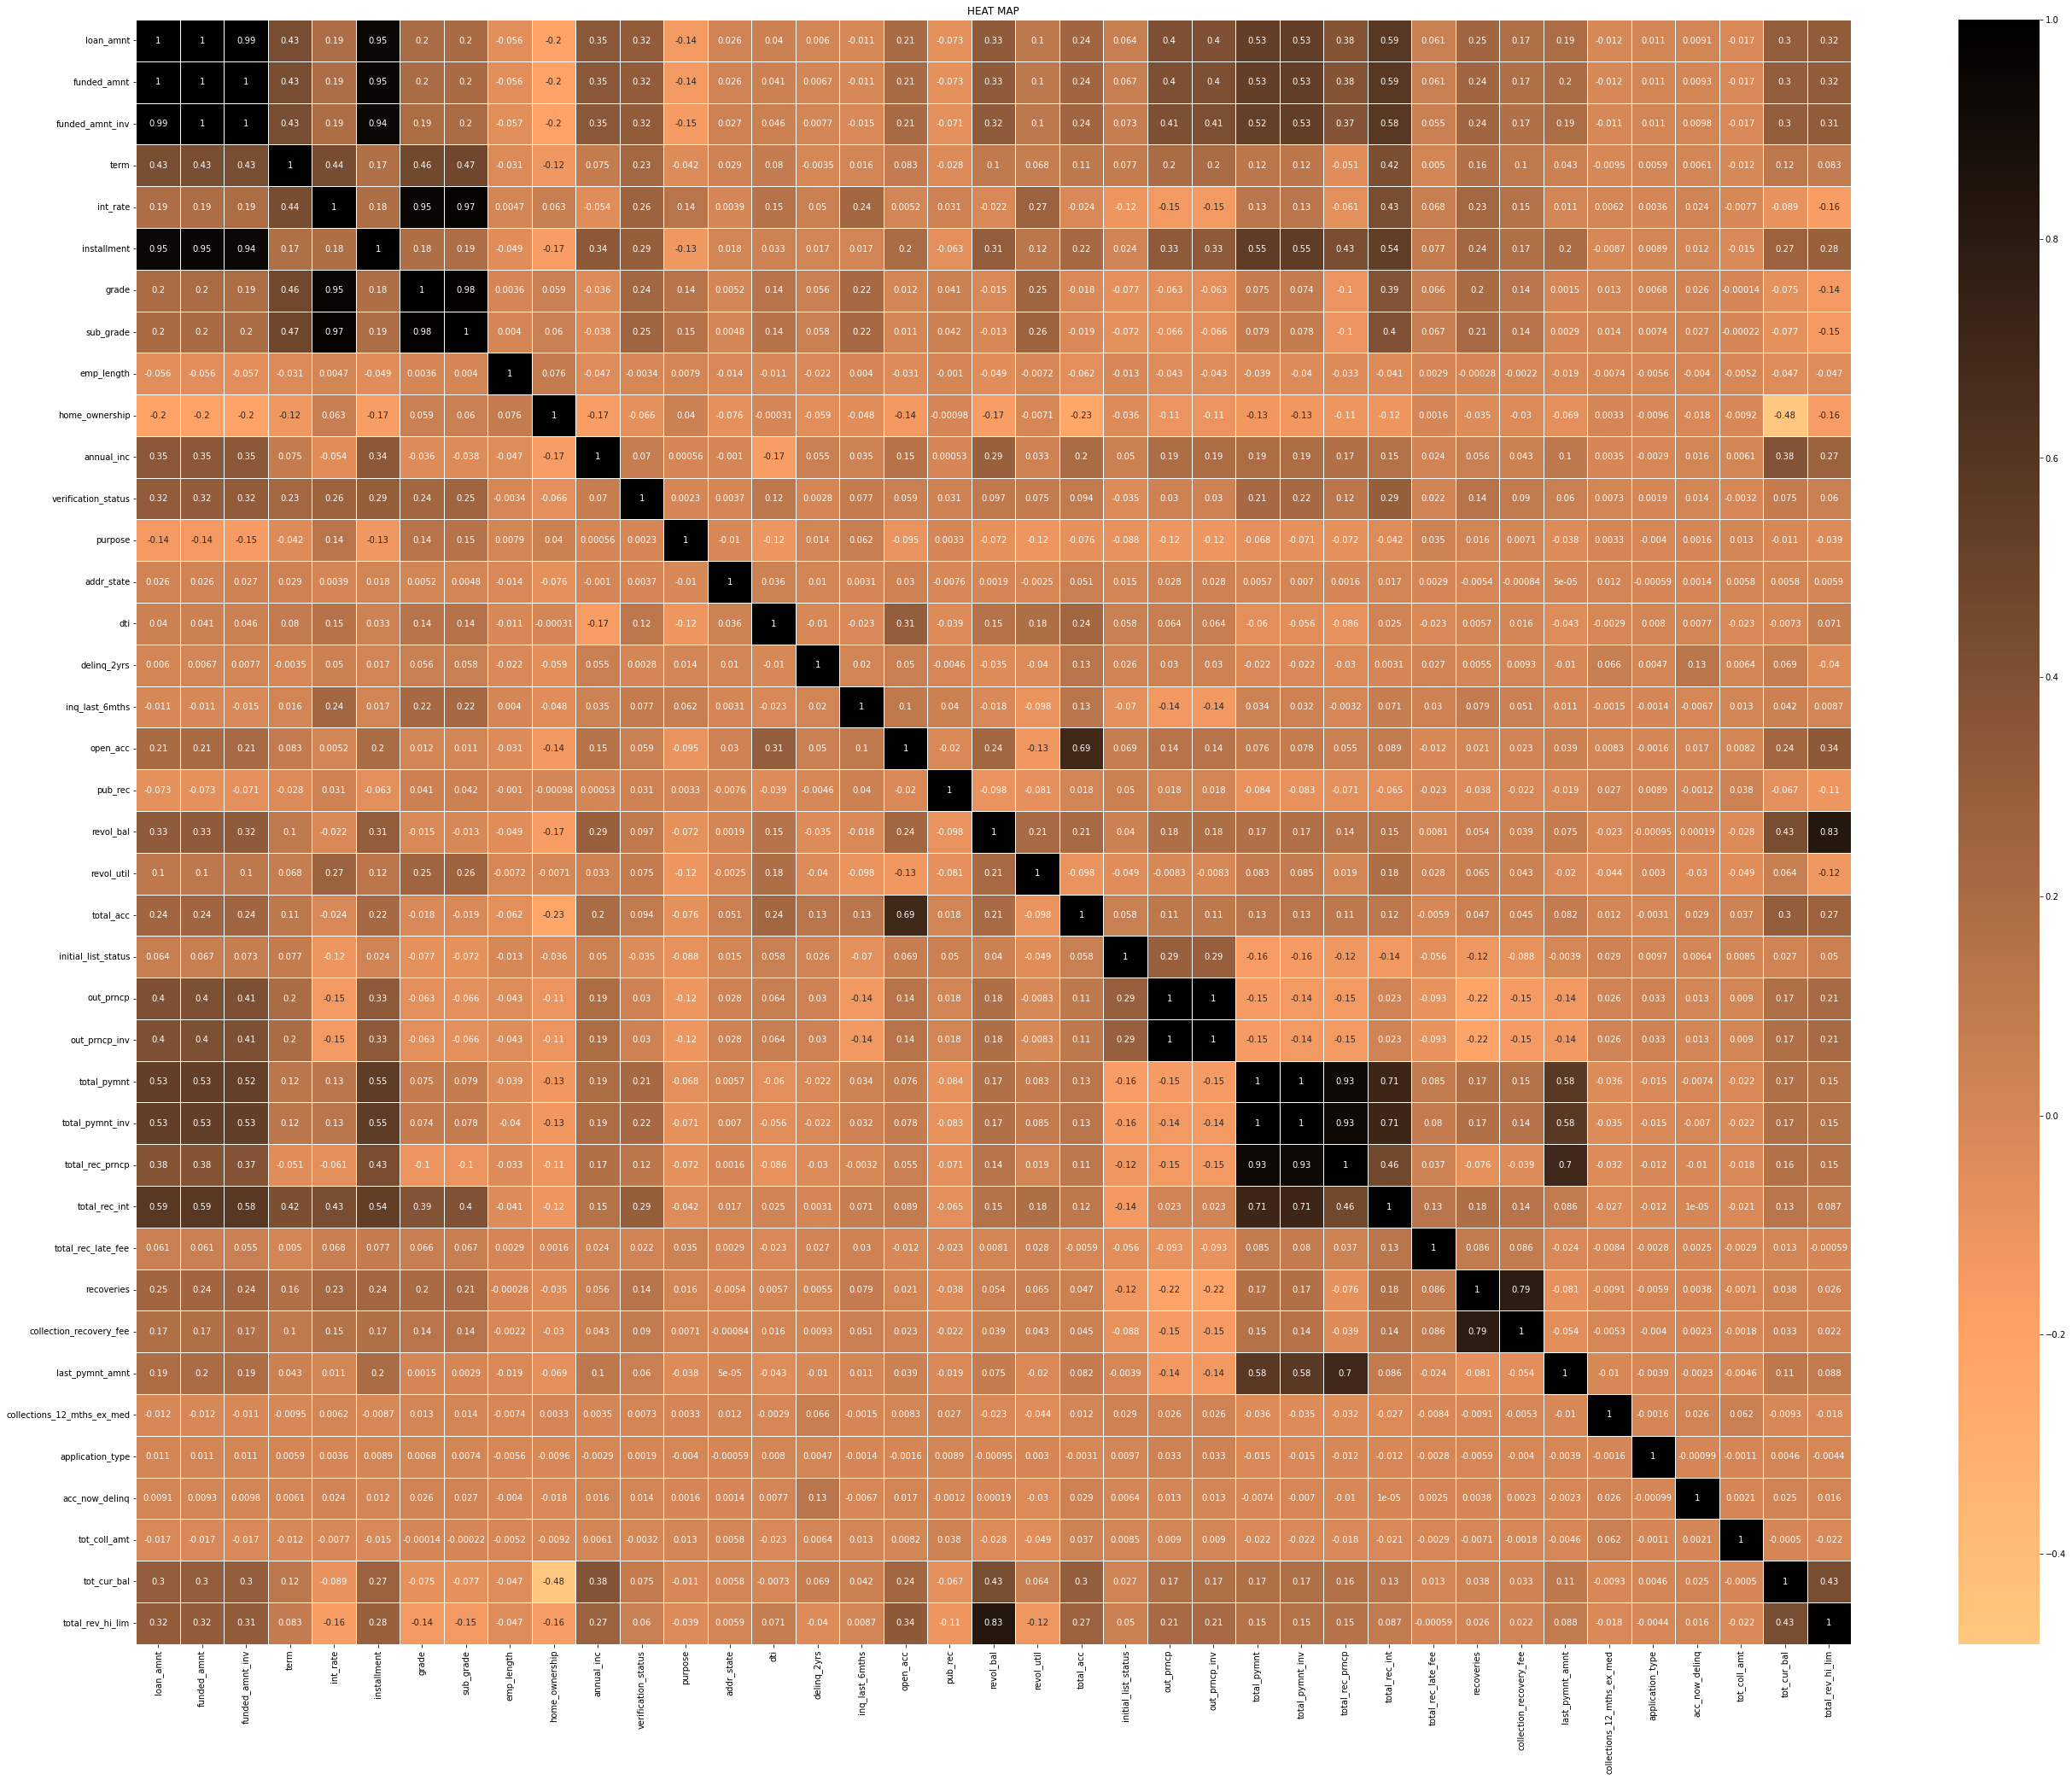

In [30]:
co=trainx.corr()
f=plt.figure(figsize=(45,35))
heatmap=sns.heatmap(co,linewidth=1,annot=True,cmap=plt.cm.copper_r)
plt.title('HEAT MAP')
plt.show()

In [31]:
def correlation(dataset,threshold):
    col_corr=set() #set of all names of correlated col
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr

In [32]:
correlation(trainx,0.55) #this is the list of columns which are highly corelated

{'collection_recovery_fee',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'installment',
 'last_pymnt_amnt',
 'out_prncp_inv',
 'sub_grade',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_prncp',
 'total_rev_hi_lim'}

In [33]:
#droping those high corelated columns from train data
trainx=trainx.drop(['collection_recovery_fee',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'installment',
 'last_pymnt_amnt',
 'out_prncp_inv',
 'sub_grade',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_prncp',
 'total_rev_hi_lim'],axis=1)

In [34]:
#droping those high corelated columns from test data too
testx=testx.drop(['collection_recovery_fee',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'installment',
 'last_pymnt_amnt',
 'out_prncp_inv',
 'sub_grade',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_prncp',
 'total_rev_hi_lim'],axis=1)

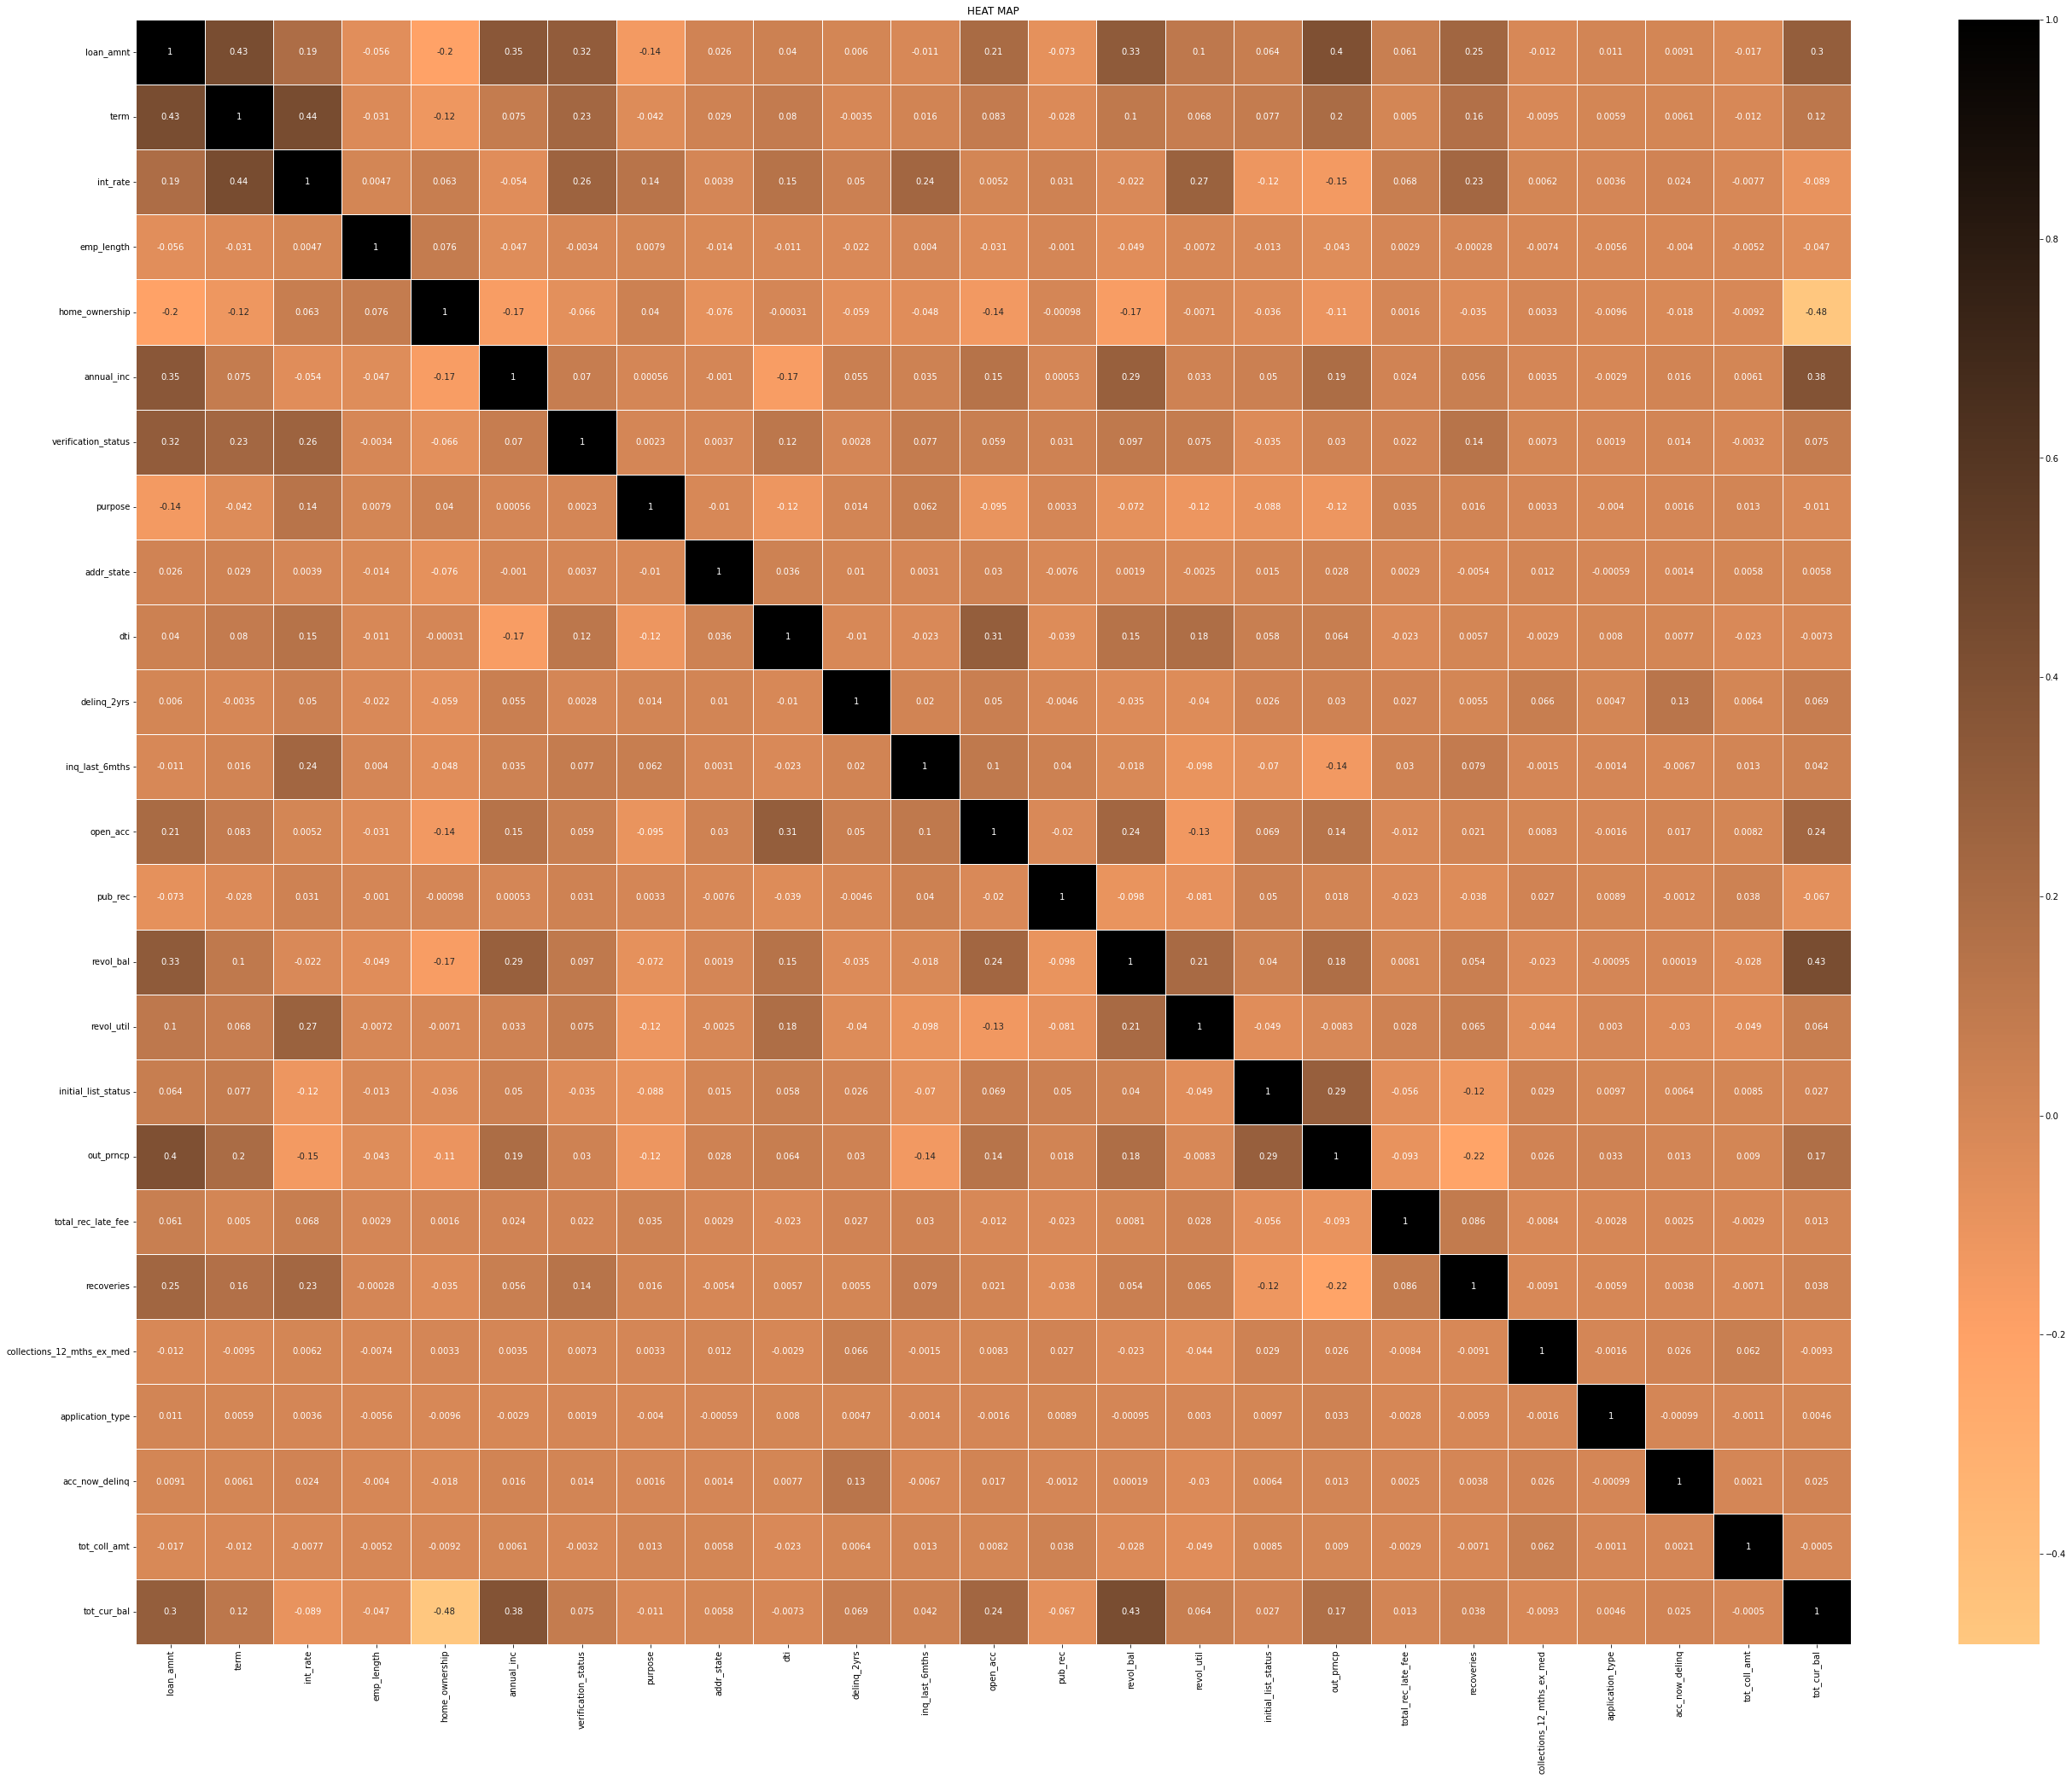

In [35]:
#result after correcting highly corelated columns
x=trainx.corr()
plt.figure(figsize=(45,35))
heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap=plt.cm.copper_r)
plt.title('HEAT MAP')
plt.show()

NOW DATA IS READY TO FIT INTO MODEL

# RANDOM FOREST

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [37]:
rf.fit(trainx,trainy)

RandomForestClassifier()

In [38]:
pred=rf.predict(testx)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
pred_prob=rf.predict_proba(testx)
pred_prob

array([[1.  , 0.  ],
       [0.93, 0.07],
       [0.98, 0.02],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.55, 0.45]])

In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred,testy)
cm

array([[55286,   344],
       [ 9563,  3285]], dtype=int64)

In [41]:
pred_accuracy=cm.diagonal().sum()/cm.sum()*100
pred_accuracy

85.53257980665323

In [42]:
from sklearn.metrics import classification_report
print(classification_report(pred,testy))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     55630
           1       0.91      0.26      0.40     12848

    accuracy                           0.86     68478
   macro avg       0.88      0.62      0.66     68478
weighted avg       0.86      0.86      0.82     68478



In [43]:
df=pd.DataFrame(pred_prob)
#_______________________________________
df.index = member_id.index
#_______________________________________
result=pd.concat([df, member_id], axis=1)
result=result.rename(columns={result.columns[1]:"YES_prob"})
result=result.rename(columns={result.columns[0]:"NO_prob"})
result

NO_prob  YES_prob  member_id
675608     1.00      0.00   57285174
533970     0.93      0.07   67808020
506152     0.98      0.02   69615472
97259      0.29      0.71    1677620
629667     0.98      0.02   60886988
...         ...       ...        ...
358998     0.40      0.60   21108411
599228     0.97      0.03   63178840
510616     0.99      0.01   69343585
463372     1.00      0.00   71766243
180151     0.55      0.45    2169462

[68478 rows x 3 columns]

In [44]:
pre=pd.DataFrame(pred)
#_________________________________________
pre.index=result.index
#__________________________________________
final=pd.concat([pre, result], axis=1)
final=final.rename(columns={final.columns[0]:"DEFAULT_IND"})
final.DEFAULT_IND.replace({0:'NO',1:'YES'},inplace=True)
final

DEFAULT_IND  NO_prob  YES_prob  member_id
675608          NO     1.00      0.00   57285174
533970          NO     0.93      0.07   67808020
506152          NO     0.98      0.02   69615472
97259          YES     0.29      0.71    1677620
629667          NO     0.98      0.02   60886988
...            ...      ...       ...        ...
358998         YES     0.40      0.60   21108411
599228          NO     0.97      0.03   63178840
510616          NO     0.99      0.01   69343585
463372          NO     1.00      0.00   71766243
180151          NO     0.55      0.45    2169462

[68478 rows x 4 columns]

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [46]:
r1=roc_auc_score(pred,testy)
r1

0.6247490521791708

In [47]:
fpr,tpr,threshold=roc_curve(testy,df.iloc[:,1])

In [48]:
fpr

array([0.00000000e+00, 0.00000000e+00, 1.54204382e-05, 3.08408765e-05,
       7.71021912e-05, 1.23363506e-04, 3.08408765e-04, 4.93454024e-04,
       7.71021912e-04, 1.03316936e-03, 1.46494163e-03, 2.08175916e-03,
       2.94530371e-03, 3.73174606e-03, 4.57987016e-03, 5.98313004e-03,
       7.47891255e-03, 9.08263813e-03, 1.10101929e-02, 1.29069068e-02,
       1.52199726e-02, 1.74867770e-02, 1.99848880e-02, 2.25909420e-02,
       2.56287684e-02, 2.88207991e-02, 3.18740459e-02, 3.58370985e-02,
       3.96922081e-02, 4.36398402e-02, 4.82505513e-02, 5.25991149e-02,
       5.70402011e-02, 6.15429691e-02, 6.63849867e-02, 7.16125152e-02,
       7.61461241e-02, 8.08647782e-02, 8.58147389e-02, 9.12735740e-02,
       9.64856821e-02, 1.01512745e-01, 1.06555228e-01, 1.11582291e-01,
       1.16686456e-01, 1.21698099e-01, 1.26817684e-01, 1.32076054e-01,
       1.37288162e-01, 1.42577372e-01, 1.47465651e-01, 1.52030101e-01,
       1.56702493e-01, 1.61606193e-01, 1.66016438e-01, 1.70719672e-01,
      

In [49]:
tpr

array([0.        , 0.31220722, 0.44502618, 0.49517773, 0.5111601 ,
       0.5197024 , 0.52328465, 0.52962249, 0.53403141, 0.53788923,
       0.5420226 , 0.54836043, 0.55414715, 0.5610361 , 0.56737393,
       0.57205842, 0.57977404, 0.5905208 , 0.60044089, 0.60925875,
       0.61862772, 0.63075227, 0.64260127, 0.65472582, 0.66685037,
       0.67952604, 0.69082392, 0.70294847, 0.71341967, 0.72664646,
       0.73849545, 0.75227335, 0.76357123, 0.77486911, 0.78313585,
       0.79167815, 0.80352714, 0.81344723, 0.82336732, 0.83025627,
       0.83631855, 0.84486084, 0.85230091, 0.86084321, 0.86635437,
       0.87489667, 0.88536787, 0.89087903, 0.89556352, 0.90079912,
       0.90520805, 0.90989253, 0.91430146, 0.92008818, 0.92477266,
       0.92890603, 0.93193717, 0.93441719, 0.93524387, 0.93882612,
       0.94130614, 0.9448884 , 0.94847065, 0.95315514, 0.95508405,
       0.95646184, 0.95811518, 0.95949297, 0.96142188, 0.96307523,
       0.96445302, 0.96500413, 0.96555525, 0.9672086 , 0.96858

In [50]:
threshold

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 ,
       0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69,
       0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58,
       0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47,
       0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36,
       0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25,
       0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14,
       0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03,
       0.02, 0.01, 0.  ])

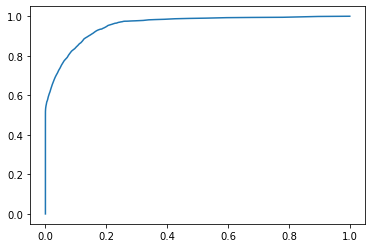

In [51]:
plt.plot(fpr,tpr)

In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [53]:
precision,recall,threshold=precision_recall_curve(testy,df.iloc[:,1])

In [54]:
precision

array([0.05299512, 0.05868925, 0.06658183, 0.07561845, 0.08539331,
       0.095228  , 0.10504288, 0.11479559, 0.12366745, 0.13219221,
       0.13935388, 0.14572906, 0.15152033, 0.15653979, 0.16099423,
       0.1646747 , 0.16746321, 0.16995725, 0.1721152 , 0.17415066,
       0.17575969, 0.17701334, 0.17837455, 0.17974206, 0.18080575,
       0.18199679, 0.18329599, 0.18474719, 0.18608843, 0.18746991,
       0.18925638, 0.19106889, 0.19276377, 0.19489443, 0.19691229,
       0.19910668, 0.20146265, 0.20351124, 0.20611369, 0.20871991,
       0.2114839 , 0.21465376, 0.21761625, 0.2207049 , 0.22485246,
       0.22891566, 0.23341642, 0.23764339, 0.24162385, 0.24614243,
       0.25089279, 0.25568182, 0.26120655, 0.26742368, 0.2740295 ,
       0.28093031, 0.28688895, 0.29353002, 0.3015444 , 0.30920724,
       0.31775314, 0.32662505, 0.33732647, 0.3493511 , 0.3601757 ,
       0.37127578, 0.38220035, 0.39764936, 0.41334705, 0.42828439,
       0.444553  , 0.46135307, 0.48234864, 0.50145264, 0.52328

In [55]:
recall

array([1.        , 0.99889777, 0.9947644 , 0.99393772, 0.99283549,
       0.99035547, 0.98897768, 0.98732433, 0.98456875, 0.98319096,
       0.98181317, 0.97878203, 0.9776798 , 0.97685313, 0.97630201,
       0.9757509 , 0.97519978, 0.97492422, 0.97492422, 0.97464866,
       0.97382199, 0.97271976, 0.97189308, 0.97161753, 0.97079085,
       0.96996418, 0.96941306, 0.96858639, 0.9672086 , 0.96555525,
       0.96500413, 0.96445302, 0.96307523, 0.96142188, 0.95949297,
       0.95811518, 0.95646184, 0.95508405, 0.95315514, 0.94847065,
       0.9448884 , 0.94130614, 0.93882612, 0.93524387, 0.93441719,
       0.93193717, 0.92890603, 0.92477266, 0.92008818, 0.91430146,
       0.90989253, 0.90520805, 0.90079912, 0.89556352, 0.89087903,
       0.88536787, 0.87489667, 0.86635437, 0.86084321, 0.85230091,
       0.84486084, 0.83631855, 0.83025627, 0.82336732, 0.81344723,
       0.80352714, 0.79167815, 0.78313585, 0.77486911, 0.76357123,
       0.75227335, 0.73849545, 0.72664646, 0.71341967, 0.70294

In [56]:
threshold

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

Text(0.5, 1.0, 'Precision-Recall')

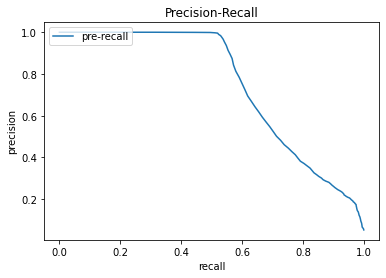

In [57]:
plt.plot(recall,precision, label="pre-recall")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="upper left")
plt.title("Precision-Recall")

# LOGISTIC REGRESSION

In [58]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [59]:
lr.fit(trainx,trainy)

LogisticRegression()

In [60]:
lp=lr.predict(testx)
lp

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [61]:
m=confusion_matrix(lp,testy)
m

array([[52218,   305],
       [12631,  3324]], dtype=int64)

In [62]:
acc=m.diagonal().sum()/m.sum()*100
acc

81.10926136861474

In [63]:
print(classification_report(pred,testy))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     55630
           1       0.91      0.26      0.40     12848

    accuracy                           0.86     68478
   macro avg       0.88      0.62      0.66     68478
weighted avg       0.86      0.86      0.82     68478



# DECISION TREE

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [65]:
dt.fit(trainx,trainy)

DecisionTreeClassifier()

In [66]:
dp=dt.predict(testx)
dp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
dm=confusion_matrix(dp,testy)
dm

array([[54071,   633],
       [10778,  2996]], dtype=int64)

In [68]:
dacc=dm.diagonal().sum()/dm.sum()*100
dacc

83.33625397938023

In [69]:
print(classification_report(pred,testy))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     55630
           1       0.91      0.26      0.40     12848

    accuracy                           0.86     68478
   macro avg       0.88      0.62      0.66     68478
weighted avg       0.86      0.86      0.82     68478



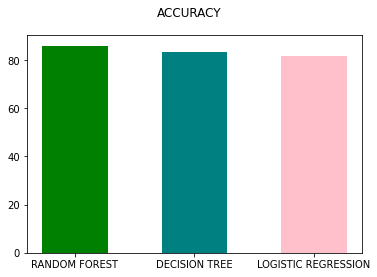

In [70]:
X=np.array(['RANDOM FOREST','DECISION TREE','LOGISTIC REGRESSION'])
Y=np.array([85.89912088553989,83.37714302403691,81.4845643856421])
c = ['green', 'teal', 'pink']
plt.bar(X,Y,color=c,width=0.55)
plt.suptitle('ACCURACY')
plt.show()

____________________________________________________________________________________________

_____________________________________________***____________________________________________________